# <font color=#f06969>Evaluation of Synthetic Data</font>

## PRISM dataset evaluation from synthetic data generated on 28/09/2020
<hr>

The following jupyter notebook evaluates the distribution, fidelity and usefulness of the synthetic data synthesised for the PRISM dataset.<br>
The evaluation methods included are:
#### 1. Distribution evaluation methods:
[1.1 Numerical variables distribution comparison](#hist_link)
<br>[1.2 Categorical variables distribution comparison](#cat_link)
<br>[1.3 Pearson's Correlation Coefficient comparison](#pearsons_link)

#### 2. Fidelity evaluation methods:
[2.1 tSNE and PCA plots comparison](#tSNE_PCA_link)
<br>[2.2 Discriminative model performance](#discrim_link)
<br>[2.3 Autocorrelation comparison](#auto_link)

#### 3. Usefulness evaluation methods:
[3.1 Predictive model performance comparison](#pred_link)
<br>[3.2 Next-step predictive model performance comparison](#tpred_link)

<hr>

# <font color=#0275D8>Importing Packages</font>

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from evaluation.helper_eval import *
from evaluation.distributions_eval import *
from evaluation.fidelity_eval import *
from evaluation.predictive_eval import *

<hr>

# <font color=#0275D8>Data Loading and Preparation </font>

In [3]:
# specify numerical columns
num_cols = ['ab_pain_dur', 'age', 'aneroxia_dur', 'plasmodium_density',
               'cough_dur', 'diarrhea_dur', 'fatigue_dur', 'fever_dur', 'headache_dur',
               'height', 'hemoglobin', 'joint_pain_dur', 'muscle_ache_dur', 'temp',
               'vomit_dur', 'weight', 'dday', 'first_dday']

# specify categorical columns
cat_cols = ['complicated_malaria_no',
    'complicated_malaria_not_assessed', 'complicated_malaria_yes',
    'febrile_no', 'febrile_yes', 'ITN_no', 'ITN_not_applicable', 'ITN_yes',
    'malaria_no', 'malaria_yes',
    'malaria_parasite_blood_smear_indicated_but_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_negative',
    'malaria_parasite_blood_smear_negative_/_lamp_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_positive',
    'malaria_parasite_blood_smear_not_indicated',
    'malaria_parasite_blood_smear_positive_/_no_malaria',
    'malaria_parasite_symptomatic_malaria',
    'malaria_treatment_artmether-lumefantrine_for_uncomplicated_malaria',
    'malaria_treatment_no_malaria_medications_given',
    'malaria_treatment_quinine_for_uncomplicated_malaria_in_the_1st_trimester_of_pregnancy',
    'malaria_treatment_quinine_for_uncomplicated_malaria_within_14_days_of_a_previous_treatment_for_malaria',
    'malaria_treatment_quinine_or_artesunate_for_complicated_malaria',
    'plasmodium_gametocytes_no', 'plasmodium_gametocytes_yes',
    'plasmodium_lamp_negative', 'plasmodium_lamp_no_result',
    'plasmodium_lamp_positive', 'visit_type_enrollment',
    'visit_type_scheduled_visit', 'visit_type_unscheduled_visit']

In [4]:
# load in original and generated (intermediate) csv
ori = pd.read_csv('data_attr/ori_prism_cleaned.csv')
gen = pd.read_csv('data_attr/gen_prism_at_int_c1000.csv')

#scale data
scaler = MinMaxScaler()
scaler.fit(ori)
ori_scaled = pd.DataFrame(scaler.transform(ori), index=ori.index, columns=ori.columns)
gen_scaled = pd.DataFrame(scaler.transform(gen), index=gen.index, columns=gen.columns)

# get numerical and categorical columns for original and generated data
# don't need to scale for one-hot encoded values (as there already between 0 and 1)
ori_num = get_numerical_columns_df(ori, num_cols)
gen_num = get_numerical_columns_df(gen, num_cols)
ori_scaled_num = get_numerical_columns_df(ori_scaled, num_cols)
gen_scaled_num = get_numerical_columns_df(gen_scaled, num_cols)
ori_cat = get_categorical_columns_df(ori, cat_cols)
gen_cat = get_categorical_columns_df(gen, cat_cols)

# turn dataframe into 3D np arrays (both cat and num data)
ori_3d = Stack2DSequence(ori) #shape (1347,130,48)
gen_3d = Stack2DSequence(gen) #shape (1347,130,48)
ori_scaled_3d = Stack2DSequence(ori_scaled) 
gen_scaled_3d = Stack2DSequence(gen_scaled)

# turn dataframe into 3D np arrays of only numerical or categorical data
ori_3d_num = Stack2DSequence(get_numerical_columns_df(ori, num_cols, return_id=True))
gen_3d_num = Stack2DSequence(get_numerical_columns_df(gen, num_cols, return_id=True))
ori_3d_scaled_num = Stack2DSequence(get_numerical_columns_df(ori_scaled, num_cols, return_id=True))
gen_3d_scaled_num = Stack2DSequence(get_numerical_columns_df(gen_scaled, num_cols, return_id=True))
ori_3d_cat = Stack2DSequence(get_categorical_columns_df(ori, cat_cols, return_id=True))
gen_3d_cat = Stack2DSequence(get_categorical_columns_df(gen, cat_cols, return_id=True))

# load in original original and generated csv already with date time and same column names as original original
ori_auto = pd.read_csv("../../isaFull.tsv", '\t')
gen_auto = pd.read_csv('data_attr/gen_prism_at_final_c1000.csv')
#remove <5 visits from original original data to match the generated data.
ori_auto_5above = ori_auto[ori_auto.groupby('Participant_Id')['Participant_Id'].transform('size') >= 5].reset_index(drop=True)

In [5]:
# create a dictionary for the case where we want to loop through multiple sets of real and gen data
synthetic_data_dic = {'DoppelGANger_0928':[ori, gen]}
synthetic_data_scaled_dic = {'DoppelGANger_0928':[ori_scaled, gen_scaled]}
synthetic_num_dic = {'DoppelGANger_0928':[ori_num, gen_num]}
synthetic_num_scaled_dic = {'DoppelGANger_0928':[ori_scaled_num, gen_scaled_num]}
synthetic_cat_dic = {'DoppelGANger_0928':[ori_cat, gen_cat]}
synthetic_array_dic = {'DoppelGANger_0928':[ori_3d, gen_3d]}
synthetic_array_scaled_dic = {'DoppelGANger_0928':[ori_scaled_3d, gen_scaled_3d]}
synthetic_array_num_dic = {'DoppelGANger_0928':[ori_3d_num, gen_3d_num]}
synthetic_array_num_scaled_dic = {'DoppelGANger_0928':[ori_3d_scaled_num, gen_3d_scaled_num]}
synthetic_array_cat_dic = {'DoppelGANger_0928':[ori_3d_cat, gen_3d_cat]}
synthetic_auto_dic = {'DoppelGANger_0928': [ori_auto_5above, gen_auto]}
syn_keys = list(synthetic_data_dic.keys())
n = len(syn_keys)

<hr>

# <font color=#0275D8> 1. Distribution evaluation</font>

<a id = "hist_link" Here ></a>

## <font color=#472F91> 1.1 Numerical variables distribution comparison </font>

### <u> Method description </u>

For numerical columns, histograms for the original dataset and the generated dataset are overlaid for each column, giving a visual perception of the similarity in diversity and distribution.
To quantify this, a Kolmogrov-Smirnov Test is performed with 100 randomly selected samples to avoid biasing the result towards rejecting the null hypothesis. The Kolmogrov-Smirnov Test is a non parametric hypothesis test where the null hypothesis is that two samples (one from the original and one from the synthetic) originate from the same distribution.
<br><b>The closer the Kolmogrov-Smirnov Test p-value is to 1, the higher the fidelity</b>

### <u> Results </u>

Overlays of original and generated histograms (probability density function) and corresponding cumulative distribution function for each column of the dataset.

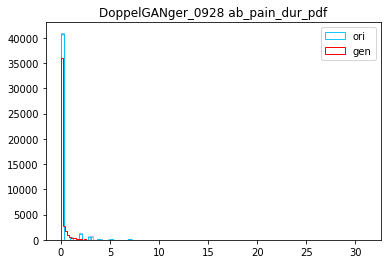

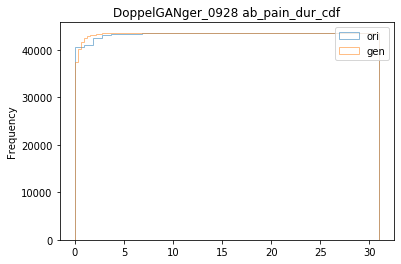

K-S test result: [3.49000000e-01 9.39898114e-05]


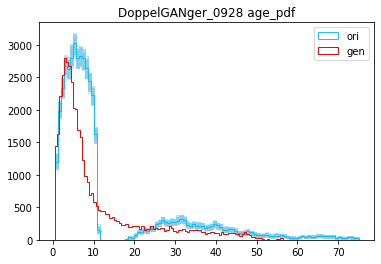

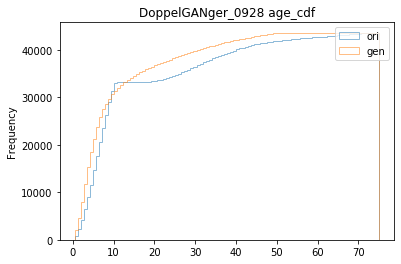

K-S test result: [0.211      0.09933939]


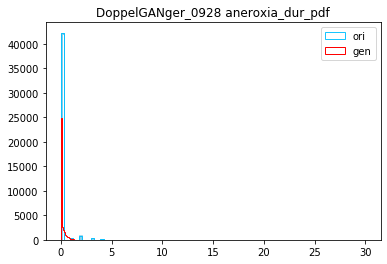

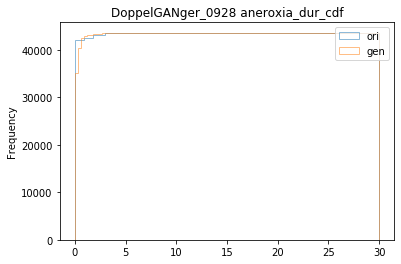

K-S test result: [5.67000000e-01 3.71261134e-13]


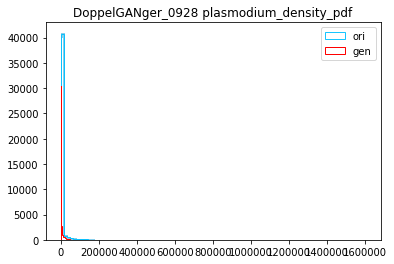

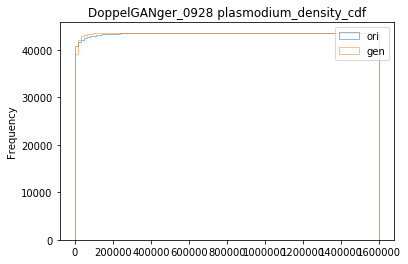

K-S test result: [0.267     0.0251721]


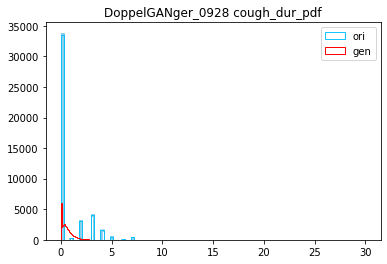

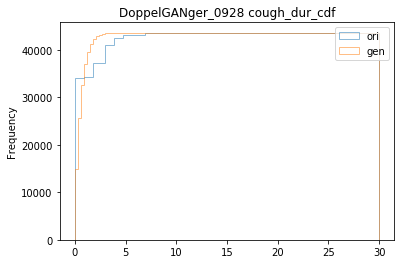

K-S test result: [6.6500000e-01 1.2040153e-18]


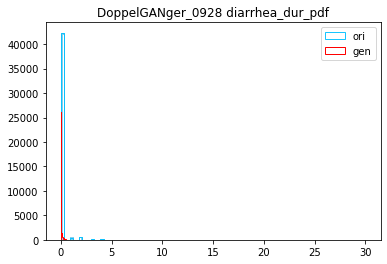

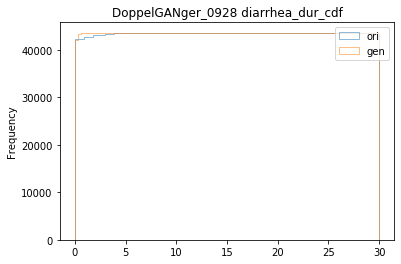

K-S test result: [3.92000000e-01 3.05949123e-05]


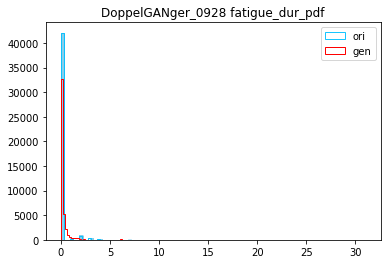

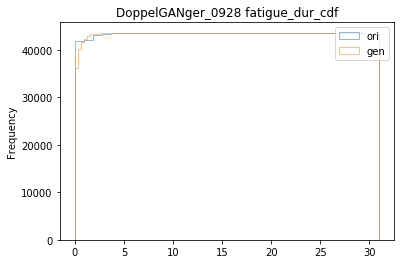

K-S test result: [8.5400000e-01 4.3601216e-33]


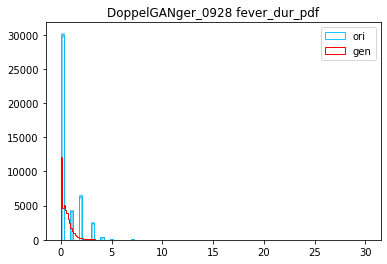

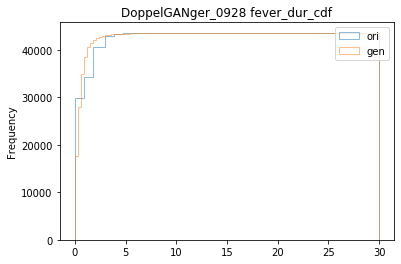

K-S test result: [5.3000000e-01 2.6043009e-11]


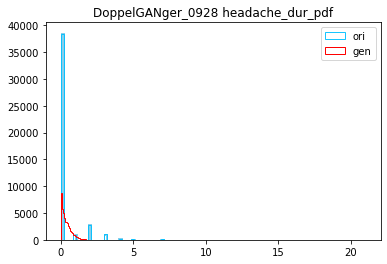

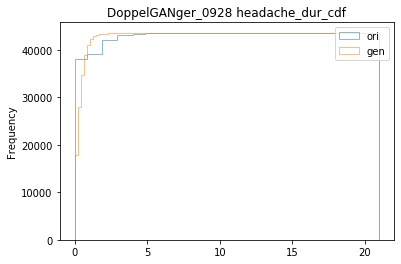

K-S test result: [7.72000000e-01 1.94199205e-25]


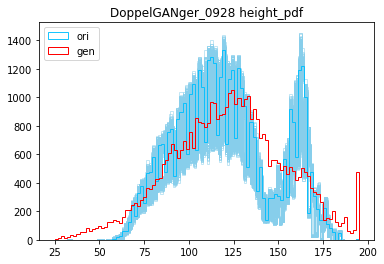

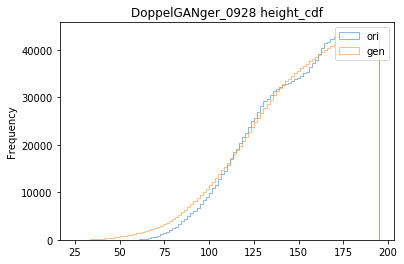

K-S test result: [0.15       0.25894753]


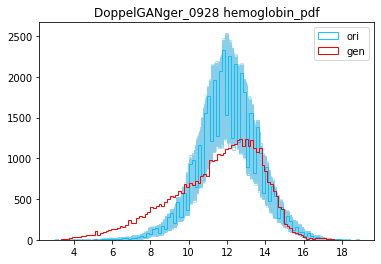

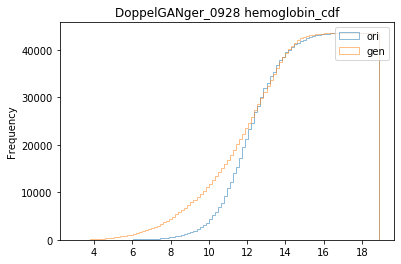

K-S test result: [0.236      0.03263269]


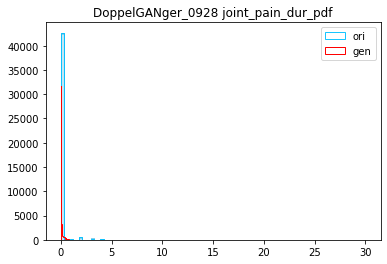

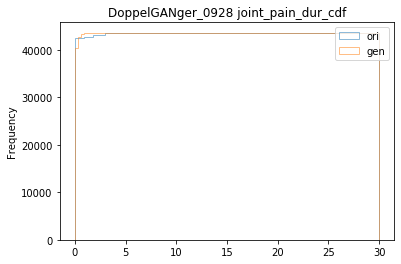

K-S test result: [4.52000000e-01 5.53853355e-07]


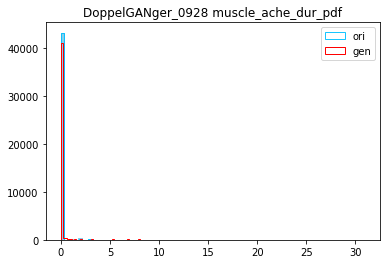

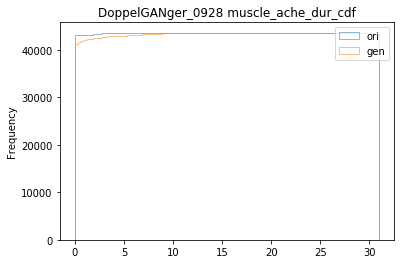

K-S test result: [0.095      0.70823941]


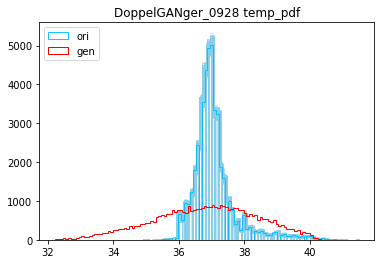

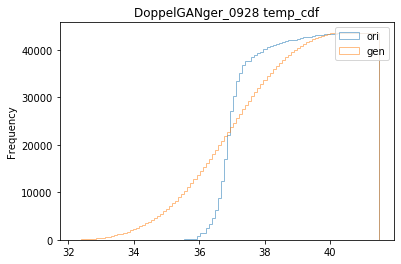

K-S test result: [3.63000000e-01 3.19908447e-04]


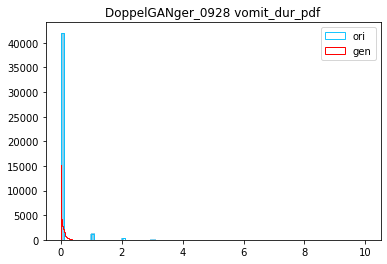

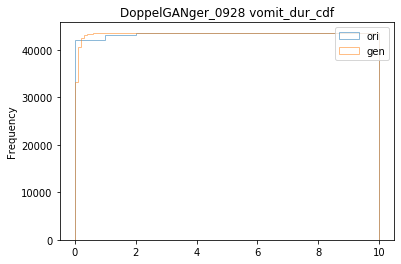

K-S test result: [6.69000000e-01 1.41648996e-18]


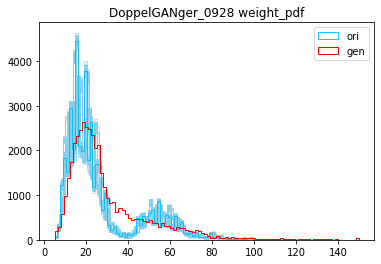

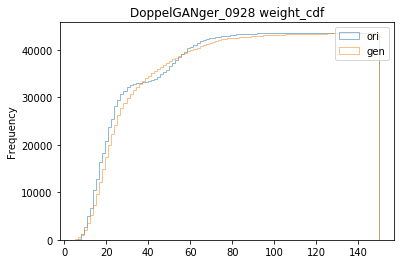

K-S test result: [0.156      0.33914972]


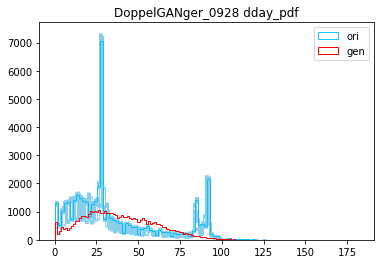

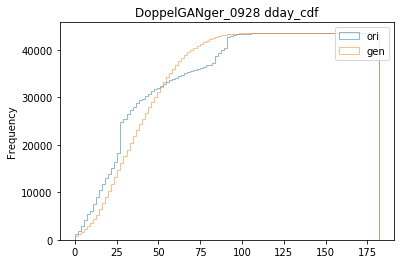

K-S test result: [0.208      0.05185731]


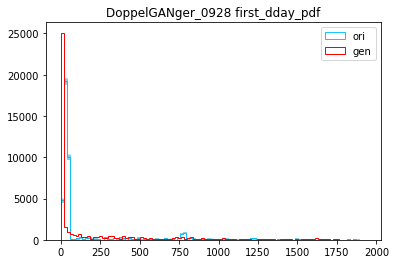

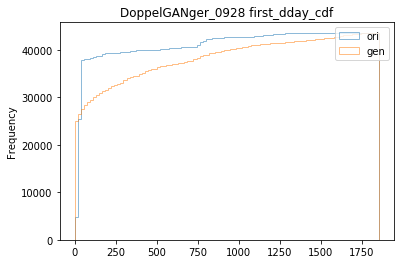

K-S test result: [5.26000000e-01 4.43209237e-10]


In [6]:
#Implement with all synthetic data and the corresponding real data.
for i in range(n):
    key = syn_keys[i]
    p_series = Histogram_KSTest(synthetic_num_dic[key][0],synthetic_num_dic[key][1],syn_name = key)
    if i == 0:
        p_df = pd.DataFrame(p_series,columns = [key])
    else:
        p_df = pd.concat([p_df,pd.DataFrame(p_series,columns = [key])],axis=1,sort = False)

### <u> Results cont. </u>

Table with p values of the Kolmogrov-Smirnov Test for each column, comparing the distribution of the original and the generated dataset. The closer the p values are to 1, the more similar the distribution of a column is between the original and the generated data.

In [7]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
display('Kolmogrov-Smirnov Test p value table',p_df)

'Kolmogrov-Smirnov Test p value table'

DoppelGANger_0928
ab_pain_dur                 0.0000940
age                         0.0993394
aneroxia_dur                0.0000000
plasmodium_density          0.0251721
cough_dur                   0.0000000
diarrhea_dur                0.0000306
fatigue_dur                 0.0000000
fever_dur                   0.0000000
headache_dur                0.0000000
height                      0.2589475
hemoglobin                  0.0326327
joint_pain_dur              0.0000006
muscle_ache_dur             0.7082394
temp                        0.0003199
vomit_dur                   0.0000000
weight                      0.3391497
dday                        0.0518573
first_dday                  0.0000000

### <u> Conclusions </u>

<a id = "cat_link" Here ></a>

## <font color=#472F91> 1.2 Categorical variables distribution comparison </font>

### <u> Method description </u>

For categorical columns, the empirical distribution of each variable for all categorical columns is calculated for the synthetic dataset and the original dataset.
A dot plot compares the empirical distribution of each variable for the original data set on the x axis and for the synthetic dataset on the y axis, giving a visual perception of the similarity in diversity and distribution. The closer the dot to the y=x line, the higher the fidelity.
<br>To quantifiy this, the MSE (mean squared error) between the empirical distribution for the original and synthetic dataset is calculated for each variable and averaged.
<br><b>The lower the averaged MSE, the higher the fidelity.</b>

### <u> Results </u>

This table displays the probability distributions for each unique variable for each categorical column. The values are plotted on the scatter plot below with generated values on the x axis which are compared to the original values on the y axis. The MSE between the generated and the original probability distributions is supplied below.

In [8]:
#Implement with all synthetic data and the corresponding real data.
d_array = np.zeros(n)
df_cat_dict = {}
for i in range(n):
    key = syn_keys[i]
    distance, df_cat = Scatter_Distance(synthetic_cat_dic[key][0],synthetic_cat_dic[key][1],syn_name = key)
    df_cat_dict[key] = df_cat
    d_array[i] = distance
distance_series= pd.Series(d_array,index = syn_keys)
display('categorical_column-averaged MSE of probability distributions of original and generated data', distance_series)

DoppelGANger_0928 gen probability  \
complicated_malaria_no                             True                          0.0492033   
complicated_malaria_not_assessed                   True                          0.9506362   
complicated_malaria_yes                            True                          0.0001605   
febrile_no                                         True                          0.7658374   
febrile_yes                                        True                          0.2341626   
ITN_no                                             True                          0.0002751   
ITN_not_applicable                                 True                          0.0309068   
ITN_yes                                            True                          0.9688181   
malaria_no                                         True                          0.9482747   
malaria_yes                                        True                          0.0517253   
malaria_parasite_blood_smear_indicated_but_not_... True                          0.0000229   
malaria_parasite_blood_smear_negative_/_lamp_ne... True                          0.4890290   
malaria_parasite_blood_smear_negative_/_lamp_no... True                          0.2845810   
malaria_parasite_blood_smear_negative_/_lamp_po... True                          0.0255417   
malaria_parasite_blood_smear_not_indicated         True                          0.0822423   
malaria_parasite_blood_smear_positive_/_no_malaria True                          0.0091253   
malaria_parasite_symptomatic_malaria               True                          0.1094578   
malaria_treatment_artmether-lumefantrine_for_un... True                          0.0489052   
malaria_treatment_no_malaria_medications_given     True                          0.9510260   
malaria_treatment_quinine_for_uncomplicated_mal... True                          0.0000229   
malaria_treatment_quinine_for_uncomplicated_mal... True                          0.0000229   
malaria_treatment_quinine_or_artesunate_for_com... True                          0.0000229   
plasmodium_gametocytes_no                          True                          0.9983721   
plasmodium_gametocytes_yes                         True                          0.0016279   
plasmodium_lamp_negative                           True                          0.3133326   
plasmodium_lamp_no_result                          True                          0.6750888   
plasmodium_lamp_positive                           True                          0.0115786   
visit_type_enrollment                              True                          0.0308380   
visit_type_scheduled_visit                         True                          0.5840193   
visit_type_unscheduled_visit                       True                          0.3851427   

                                                         DoppelGANger_0928 ori probability  
complicated_malaria_no                             True                          0.1220322  
complicated_malaria_not_assessed                   True                          0.8762160  
complicated_malaria_yes                            True                          0.0017519  
febrile_no                                         True                          0.6865829  
febrile_yes                                        True                          0.3134171  
ITN_no                                             True                          0.0017312  
ITN_not_applicable                                 True                          0.0277617  
ITN_yes                                            True                          0.9705070  
malaria_no                                         True                          0.8762160  
malaria_yes                                        True                          0.1237840  
malaria_parasite_blood_smear_indicated_but_not_... True                          0.0000412  
malaria_parasite_blood_sme

'categorical_column-averaged MSE of probability distributions of original and generated data'

DoppelGANger_0928   0.0033473
dtype: float64

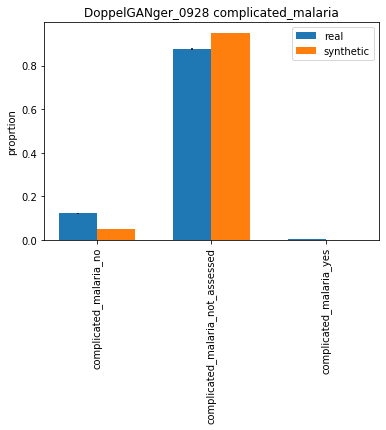

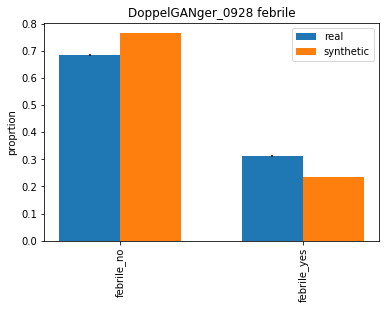

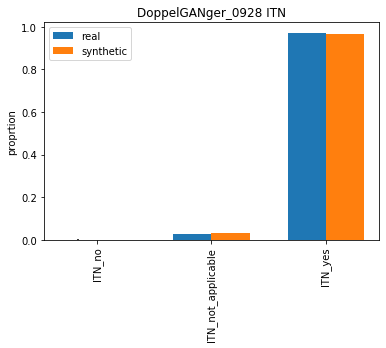

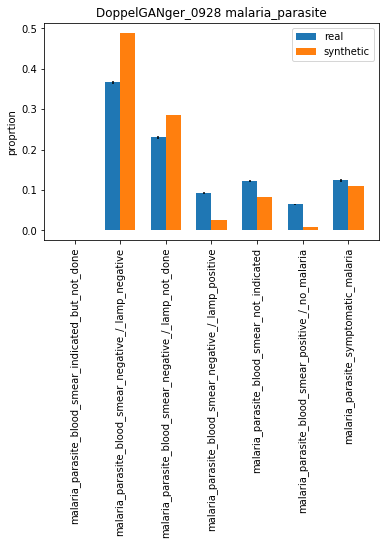

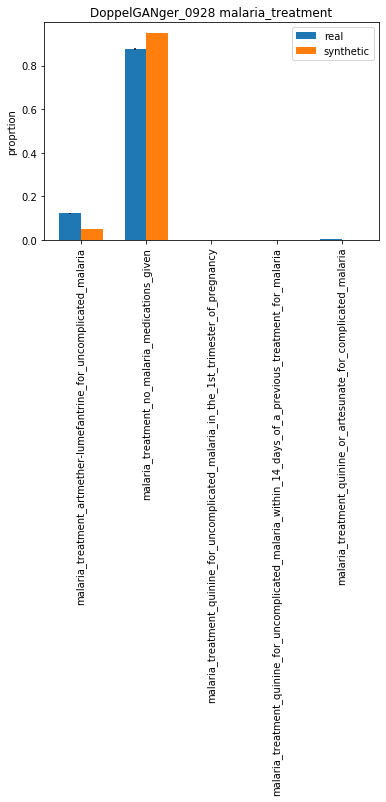

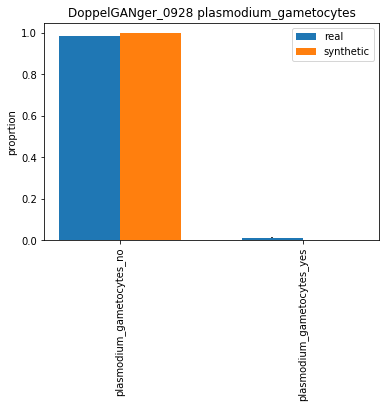

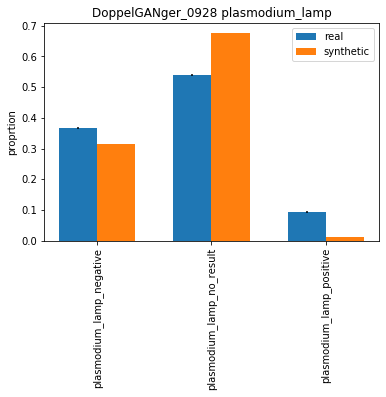

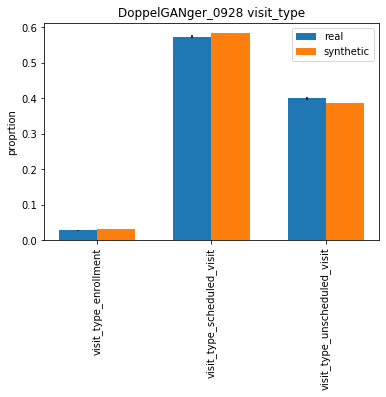

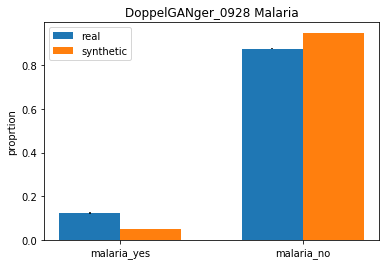

In [9]:
cat_col_distribution(synthetic_cat_dic)

### <u> Conclusions </u>

<a id = "pearsons_link" Here ></a>

## <font color=#472F91> 1.3 Pearson's Correlation Coefficient Comparison </font>

### <u> Method description </u>

To confirm dependencies between variables within columns are maintained, Pearson’s R correlation coefficient is calculated between categorical (all?) columns within the original and synthetic data. The R value measures the strength of association between 2 columns. Ideally, the real and synthetic data should have the same R value for a given pair of columns.
<br>To compare the datasets, we use two measurements. Firstly, the MSE (mean standard error) is calculated between each correlation coefficient.
<br><b>The lower the MSE, the higher the fidelity.</b>
<br>Next, we perform hypothesis testing on the mean MSE value to determine if it is different from zero.
<br><b>The larger the p-value from the hypothesis test, the more likely the mean MSE value is zero.</b>
<br>Secondly, the SRA (Synthetic Ranking Agreement) for each column is calculated. Here, the R correlation coefficients for the remaining columns are ranked for both the synthetic and the original data and compared.
<br><b>The closer SRA is to 1 the higher the fidelity.</b>

### <u> Results </u>

Two tables are displayed with the R correlation coefficient between all columns, for the original and for the generated data. For high level of correlation with an R > 0.5, the cell is coloured yellow. The fourth table displays the MSEs between the R correlation coefficients between the original and the generated data, displaying the result for each column.

In [10]:
n = len(syn_keys)
MSE_array = np.zeros(n)
p_val_array = np.zeros(n)
for i in range(n):
    key = syn_keys[i]
    df_ori = synthetic_data_dic[key][0]
    df_gen = synthetic_data_dic[key][1]
    r_table_ori = r_corr_test(df_ori)
    r_table_gen = r_corr_test(df_gen)

    display(key+' '+'generated r table',r_table_gen.style.applymap(color_threshold_yellow))
    display(key+' '+'real r table',r_table_ori.style.applymap(color_threshold_yellow))
    sra = CorrelationSRA(r_table_ori,r_table_gen,ColumnWise=True)
    if i==0:
        sra_df = pd.DataFrame(sra,columns = [key])
    else:
        sra_df = pd.concat([sra_df,pd.DataFrame(sra,columns = [key])], axis = 1, sort = False)
    #display(key+' '+'SRA',sra)
    MSE_df, MSE_score = MSE(r_table_gen,r_table_ori)
    display(key+' '+'MSE table', MSE_df)
    p_val = hyp_test_mean_mse(MSE_df)
    MSE_array[i] = MSE_score
    p_val_array[i] = p_val
MSE_series = pd.Series(MSE_array,index = syn_keys)
MSE_pval_series = pd.Series(p_val_array,index = syn_keys)

'DoppelGANger_0928 generated r table'

'DoppelGANger_0928 real r table'

'DoppelGANger_0928 MSE table'

id  ab_pain_dur  \
id                                                 0.0000000    0.0000001   
ab_pain_dur                                        0.0000001    0.0000000   
age                                                0.0000543    0.0757754   
aneroxia_dur                                       0.0001673    0.0016520   
plasmodium_density                                 0.0008983    0.0119280   
cough_dur                                          0.0070264    0.0288263   
diarrhea_dur                                       0.0051440    0.0094514   
fatigue_dur                                        0.0015643    0.1283151   
fever_dur                                          0.0090417    0.0056078   
headache_dur                                       0.0000241    0.0022764   
height                                             0.0063598    0.0391861   
hemoglobin                                         0.0045759    0.0026032   
joint_pain_dur                                     0.0000000    0.1976636   
muscle_ache_dur                                    0.0001900    0.1085765   
temp                                               0.0105662    0.0014289   
vomit_dur                                          0.0028890    0.0042874   
weight                                             0.0083776    0.0673556   
complicated_malaria_no                             0.0103079    0.0021726   
complicated_malaria_not_assessed                   0.0100279    0.0021249   
complicated_malaria_yes                            0.0000173    0.0000010   
febrile_no                                         0.0052957    0.0094133   
febrile_yes                                        0.0052957    0.0094133   
ITN_no                                             0.0002609    0.0000083   
ITN_not_applicable                                 0.0011129    0.0000047   
ITN_yes                                            0.0012276    0.0000133   
malaria_no                                         0.0091590    0.0019851   
malaria_yes                                        0.0091590    0.0019851   
malaria_parasite_blood_smear_indicated_but_not_... 0.0000201    0.0000002   
malaria_parasite_blood_smear_negative_/_lamp_ne... 0.0099710    0.0109451   
malaria_parasite_blood_smear_negative_/_lamp_no... 0.0048385    0.0009965   
malaria_parasite_blood_smear_negative_/_lamp_po... 0.0104310    0.0031300   
malaria_parasite_blood_smear_not_indicated         0.0000227    0.0219909   
malaria_parasite_blood_smear_positive_/_no_malaria 0.0089406    0.0018037   
malaria_parasite_symptomatic_malaria               0.0068909    0.0020501   
malaria_treatment_artmether-lumefantrine_for_un... 0.0105353    0.0020207   
malaria_treatment_no_malaria_medications_given     0.0103582    0.0020342   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000224    0.0001690   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0001217    0.0000231   
malaria_treatment_quinine_or_artesunate_for_com... 0.0000016    0.0000029   
plasmodium_gametocytes_no                          0.0016374    0.0000164   
plasmodium_gametocytes_yes                         0.0016374    0.0000164   
plasmodium_lamp_negative                           0.0090821    0.0100664   
plasmodium_lamp_no_result                          0.0016260    0.0151592   
plasmodium_lamp_positive                           0.0075144    0.0021131   
visit_type_enrollment                              0.0011352    0.0000042   
visit_type_scheduled_visit                         0.0012557    0.0323077   
visit_type_unscheduled_visit                       0.0022030    0.0325271   
dday                                               0.0372249    0.0019426   
first_dday                                         0.0124648    0.0006265   

                                                         age  aneroxia_dur  \
id                                                 0.0000543     0.0001673   
ab_pain_dur                                        

### <u> Results cont. </u>

The averaged MSE for all columns and the p-value between the orignal and generated data is presented below.
<br>The table below the MSE includes the SRA (Synthetic Ranking Accuracy) for each column where it's R correlation coefficients with the remaining columns are ranked for both the synthetic and the original data and compared.

In [11]:
display('averaged MSE values of R for each version of synthetic data', MSE_series)
display('p-values for MSE values of r for each version of synthetic data', MSE_pval_series)

'averaged MSE values of R for each version of synthetic data'

DoppelGANger_0928   0.0219599
dtype: float64

'p-values for MSE values of r for each version of synthetic data'

DoppelGANger_0928   0.0000000
dtype: float64

In [12]:
display('SRA: Ranking each column and comparing between original and generated data', sra_df)

'SRA: Ranking each column and comparing between original and generated data'

DoppelGANger_0928
id                                                          0.5603741
ab_pain_dur                                                 0.6734694
age                                                         0.7551020
aneroxia_dur                                                0.5824830
plasmodium_density                                          0.5331633
cough_dur                                                   0.6496599
diarrhea_dur                                                0.6147959
fatigue_dur                                                 0.6445578
fever_dur                                                   0.7023810
headache_dur                                                0.5935374
height                                                      0.7806122
hemoglobin                                                  0.7865646
joint_pain_dur                                              0.6887755
muscle_ache_dur                                             0.7040816
temp                                                        0.7644558
vomit_dur                                                   0.6437075
weight                                                      0.7517007
complicated_malaria_no                                      0.8197279
complicated_malaria_not_assessed                            0.8018707
complicated_malaria_yes                                     0.6215986
febrile_no                                                  0.7874150
febrile_yes                                                 0.7882653
ITN_no                                                      0.5714286
ITN_not_applicable                                          0.8571429
ITN_yes                                                     0.8265306
malaria_no                                                  0.7976190
malaria_yes                                                 0.7984694
malaria_parasite_blood_smear_indicated_but_not_...          0.6717687
malaria_parasite_blood_smear_negative_/_lamp_ne...          0.8137755
malaria_parasite_blood_smear_negative_/_lamp_no...          0.8112245
malaria_parasite_blood_smear_negative_/_lamp_po...          0.6921769
malaria_parasite_blood_smear_not_indicated                  0.7619048
malaria_parasite_blood_smear_positive_/_no_malaria          0.6726190
malaria_parasite_symptomatic_malaria                        0.8188776
malaria_treatment_artmether-lumefantrine_for_un...          0.8316327
malaria_treatment_no_malaria_medications_given              0.8180272
malaria_treatment_quinine_for_uncomplicated_mal...          0.6581633
malaria_treatment_quinine_for_uncomplicated_mal...          0.8010204
malaria_treatment_quinine_or_artesunate_for_com...          0.7414966
plasmodium_gametocytes_no                                   0.5637755
plasmodium_gametocytes_yes                                  0.5654762
plasmodium_lamp_negative                                    0.7984694
plasmodium_lamp_no_result                                   0.8120748
plasmodium_lamp_positive                                    0.6845238
visit_type_enrollment                                       0.8503401
visit_type_scheduled_visit                                  0.7380952
visit_type_unscheduled_visit                                0.7780612
dday                                                        0.7602041
first_dday                                                  0.6301020
AVERAGE                                                     0.7219041

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 2. Fidelity Evaluation </font>

<a id = "tSNE_PCA_link" Here ></a>

## <font color=#472F91> 2.1 tSNE and PCA plots comparison </font>

### <u> Method description </u>

tSNE and PCA plots reduce a multi-dimensional dataset (i.e with multiple columns) into a 2-dimensional visualisation. 
<br>A machine-learning algorithm groups similar variables and although we cannot interpret the coordinates attributed, we can compare if the groupings made are similar in the original and synthetic data by overlaying the plots.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

tSNE and PCA plot overlays for original and generated data

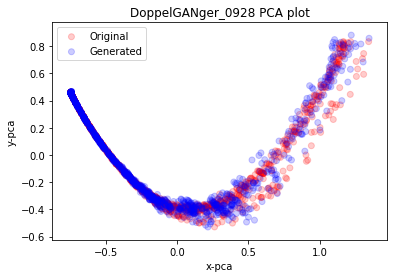

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.021s...
[t-SNE] Computed neighbors for 2000 samples in 1.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.094044
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.714851
[t-SNE] KL divergence after 300 iterations: 0.353664


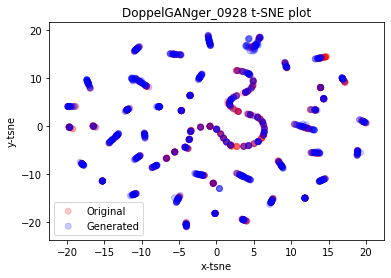

In [13]:
for i in range(n):
    key = syn_keys[i]
    dp_pca_results, dp_pca_hat_results = visualization(synthetic_array_scaled_dic[key][0], synthetic_array_scaled_dic[key][1], 'pca',syn_name = key)
    dp_tsne_results, dp_tsne_hat_results = visualization(synthetic_array_scaled_dic[key][0], synthetic_array_scaled_dic[key][1], 'tsne',syn_name = key)

### <u> Conclusions </u>

<a id = "discrim_link" Here ></a>

## <font color=#472F91> 2.2 Discriminative model performance </font>

### <u> Model Description </u>
For a quantitative measure of similarity, a post-hoc time-series classification model is trained (by optimizing a multi-layer GRU) to distinguish between sequences from the original and generated datasets.
First, each original sequence is labeled '1', and each generated sequence is labeled '0'.
<br>Then, an off-the-shelf (RNN) classifier is trained to distinguish between the two classes as a standard supervised task.
<br>An accuracy score on the held-out test set gives a quantitative assessment of fidelity.
<br><b>An accuracy score similar to the expected accuracy score for an untrained discriminative model indicates the discriminator cannot tell the difference between both datasets.</b>

### <u> Results </u>

A table with the report is displayed together with the expected accuracy and the obtained accuracy. The more similar these two values are, the better the fidelity of the generated data towards the original data.

In [14]:
for i in range(n):
    key = syn_keys[i]

    # train discriminative model
    train_data, val_data, test_data, train_labels, val_labels, test_labels = train_val_test_split(ori_data=synthetic_array_num_scaled_dic[key][0], gen_data=synthetic_array_num_scaled_dic[key][0])

    input_dim = np.asarray(synthetic_array_num_scaled_dic[key][0]).shape[2]
    d_model = discriminative_model(input_size=[None, input_dim], hidden_dim=64)

    # CHANGE TO MORE EPOCHS
    history_d_model = d_model.fit(train_data, train_labels, batch_size=128, epochs=100, validation_data=(val_data, val_labels), verbose=0)

    d_model.evaluate(test_data, test_labels)

    # get prediction from test data
    test_pred = np.round(d_model.predict(test_data))

    report = classification_report(test_labels, test_pred, digits=5, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)

    exp_acc = np.sum(test_labels)/np.shape(test_labels)[0]
    print('Expected accuracy for an untrained discriminative model = ', str(exp_acc))
    print('Final accuracy of trained discriminative model = ', str(accuracy_score(test_labels, test_pred)))

13/13 [==============================] - 0s 25ms/step - loss: 0.7034
              precision    recall  f1-score     support
0.0           0.5050251 0.9901478 0.6688852 203.0000000
1.0           0.7142857 0.0247525 0.0478469 202.0000000
accuracy      0.5086420 0.5086420 0.5086420   0.5086420
macro avg     0.6096554 0.5074501 0.3583660 405.0000000
weighted avg  0.6093971 0.5086420 0.3591328 405.0000000
Expected accuracy for an untrained discriminative model =  0.49876543209876545
Final accuracy of trained discriminative model =  0.508641975308642


### <u> Conclusions </u>

<a id = "auto_link" Here ></a>

## <font color=#472F91> 2.3 Autocorrelation comparison </font>

### <u> Model description </u>

To confirm the variance in numerical values/counts over time are maintained, autocorrelation graphs are plotted for both datasets and overlayed.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

The following plots show overlays of the autocorrelation plots for original and generated data for number of visits per week and number of positive malaria diagnosis per week.

In [15]:
acf_dict = {}
for i in range(n):
    key = syn_keys[i]
    ori_auto_5above, table_freq_visit_week_ori = auto_prep(synthetic_auto_dic[key][0])
    gen_auto, table_freq_visit_week_gen = auto_prep(synthetic_auto_dic[key][1])
    acf_df_week_visits, autocorrelation_plot_week_visits = autocorrelation(ori_auto_5above, gen_auto, table_freq_visit_week_ori,table_freq_visit_week_gen, key, " plot for number of visits per week")
    acf_dict[key] = acf_df_week_visits
    display(autocorrelation_plot_week_visits)


/Users/rebecafiadeiro/Documents/HDI/synthetic-data-service/doppelganger/gan/evaluation/fidelity_eval.py:182: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/rebecafiadeiro/Documents/HDI/synthetic-data-service/doppelganger/gan/evaluation/fidelity_eval.py:185: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
acf_malaria_dict = {}
for i in range(n):
    key = syn_keys[i]
    malaria_ori=subset(synthetic_auto_dic[key][0],'Malaria diagnosis [EUPATH_0000090]')
    malaria_gen=subset(synthetic_auto_dic[key][1],'Malaria diagnosis [EUPATH_0000090]')
    malaria_ori, table_freq_malaria_ori = auto_prep(malaria_ori)
    malaria_gen, table_freq_malaria_gen = auto_prep(malaria_gen)
    acf_df_malaria, autocorrelation_plot_malaria=autocorrelation(malaria_ori, malaria_gen, table_freq_malaria_ori, table_freq_malaria_gen, key, " plot for malaria diagnosis per week")
    acf_malaria_dict[key] = acf_df_malaria
    display(autocorrelation_plot_malaria)

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 3. Usefulness evaluation </font>

<a id = "pred_link" Here ></a>

## <font color=#472F91> 3.1 Predictive model performance comparison </font>

### <u> Method description </u>

A series of commonly used regression based predictive models (Linear Regression, Linear Support Vector Regression, Random Forests Regression, Logistic Regression, Decision tree Regression and K-Nearest Neighbors Regression) are applied to the test samples and trained on the train samples for both the original and the synthetic data (Test-on-real, Train-on-real & Test-on-synthetic, Train-on-synthetic). The model attempts to predict a variable within a column based on the remaining columns.  
    The MSE (mean squared error) is calculated between the predicted value resulting from the predictive model and the test sample and averaged (MSE_1), resulting in MSE_1's for each column, for each predictive model, for the original and synthetic datasets (visualised in the first scatter plot below).  
    <br>To compare the datasets, the MSE between the MSE_1's of the original and the synthetic dataset is calculated (MSE_2), resulting in MSE_2's for each predictive model.
    <br>The average of MSE_1's for all columns is calculated between the datasets (MSE_3), resulting in MSE_3 for each predictive model, for the original and the synthetic dataset (visualised in the second scatter plot below).
    <br> To compare datasets, the MSE between the MSE_3's for the original and the synthetic data is calculated (MSE_4).
    <br><b>A low MSE_2/MSE_4 indicates the synthetic and original dataset behaved similarly in the predictive models.</b>
    <br>Because users to do not have access to the original data, synthetic data should behave similarly to the original data when trained using any algorithms.  
    To assess this, we use SRA (Synthetic Ranking Agreement) which focuses on measuring how similar algorithms perform when trained with original and synthetic data. The MSE_1's (MSE for each column) for each predictive model are ranked and the ranking  of the original and synthetic data are compared, resulting in SRA_1 for each column.
    <br>Similarly, the MSE_3's (column-averaged MSE) for each predictive model can be ranked, giving an SRA_2 measure.
    <br><b>SRA values close to 1 indicate the synthetic and original dataset behave similarly when trained on different predictive models.</b>

### <u> Results </u>

The following table shows the MSE_1's (i.e the prediction scores) obtained for each column for each predictive model in the original and in the generated data. 
<br>The original log(MSE_1) and the generated log(MSE_1) are used as coordinates for the scatter plot below. We use the log(MSE) (instead of the MSE) to simplify visualisation.
<br>The MSE's between the original and the generated data (MSE_2) can be seen below the scatter plots for each model. The averaged MSE between all models is also displayed.

In [17]:
# MSE_1
colmse_t = Comparison_Table(synthetic_num_scaled_dic, aver=False, models=['LR', 'KNR1', 'DTR'])
pd.set_option('display.max_columns', 200)
display(colmse_t)

DoppelGANger_0928                                                      \
                   ori                                                       
           ab_pain_dur       age aneroxia_dur plasmodium_density cough_dur   
LR           0.0011583 0.0106293    0.0002805          0.0003473 0.0021818   
KNR1         0.0012653 0.0068532    0.0003108          0.0004059 0.0024860   
DTR          0.0018932 0.0014510    0.0005726          0.0008094 0.0042071   

                                                                           \
                                                                            
     diarrhea_dur fatigue_dur fever_dur headache_dur    height hemoglobin   
LR      0.0002958   0.0003690 0.0008360    0.0012085 0.0048303  0.0075938   
KNR1    0.0003228   0.0003863 0.0009309    0.0012727 0.0016446  0.0082854   
DTR     0.0004466   0.0007130 0.0014341    0.0021836 0.0009635  0.0107321   

                                                                             \
                                                                              
     joint_pain_dur muscle_ache_dur      temp vomit_dur    weight      dday   
LR        0.0003730       0.0002418 0.0041531 0.0007855 0.0025576 0.0211327   
KNR1      0.0003999       0.0002445 0.0043949 0.0008849 0.0016970 0.0233817   
DTR       0.0006541       0.0003039 0.0068375 0.0016620 0.0011470 0.0377404   

                                                                       \
                        gen                                             
     first_dday ab_pain_dur       age aneroxia_dur plasmodium_density   
LR    0.0260673   0.0001002 0.0059659    0.0000978          0.0000331   
KNR1  0.0265773   0.0000618 0.0021662    0.0000415          0.0000306   
DTR   0.0419315   0.0000795 0.0012474    0.0000166          0.0000215   

                                                                          \
                                                                           
     cough_dur diarrhea_dur fatigue_dur fever_dur headache_dur    height   
LR   0.0002610    0.0000086   0.0001465 0.0004655    0.0002837 0.0061214   
KNR1 0.0002261    0.0000052   0.0000871 0.0002681    0.0001535 0.0036319   
DTR  0.0003102    0.0000057   0.0000957 0.0002958    0.0001623 0.0048776   

                                                                              \
                                                                               
     hemoglobin joint_pain_dur muscle_ache_dur      temp vomit_dur    weight   
LR    0.0033642      0.0000150       0.0013039 0.0064244 0.0000423 0.0051992   
KNR1  0.0024069      0.0000079       0.0004685 0.0042792 0.0000382 0.0021843   
DTR   0.0035382      0.0000098       0.0001647 0.0048346 0.0000345 0.0014181   

                           
                           
          dday first_dday  
LR   0.0087219  0.0315706  
KNR1 0.0067190  0.0212903  
DTR  0.0100114  0.0066673

In [18]:
plot_colmse(colmse_t)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [19]:
# MSE_2
avg_modelmse_t = get_avg_mse_per_model(colmse_t)
print("Column-averaged MSE between real and generated data for each model")
display(avg_modelmse_t)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning:

indexing past lexsort depth may impact performance.



Column-averaged MSE between real and generated data for each model


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning:

indexing past lexsort depth may impact performance.



DoppelGANger_0928
LR            0.0000136
KNR1          0.0000209
DTR           0.0001173

In [20]:
print("mean across models of the column-averaged-MSE ")
get_mean_avg_modelmse(avg_modelmse_t)

mean across models of the column-averaged-MSE 


DoppelGANger_0928
mean model-averaged mse          0.0000506

### <u> Results cont. </u>
The following table shows the column-averaged MSE's from MSE_1 values (MSE_3) for each predictive model for the original and synthetic data. 
<br>The original and generated MSE values are used as coordinates for the scatter plot below. 
<br> The MSE between the original and generated values (MSE_4) is shown below.

In [21]:
# MSE_3
com_t = Comparison_Table(synthetic_num_scaled_dic, aver=True, models=['LR', 'KNR1','DTR'])
print('column-averaged MSE for each model for the original and synthetic data')
display(com_t)

column-averaged MSE for each model for the original and synthetic data


DoppelGANger_0928          
               ori MSE   gen MSE
LR           0.0047091 0.0039624
KNR1         0.0045203 0.0024551
DTR          0.0064827 0.0018682

In [22]:
Scatter_TSTS_TRTR(com_t)

In [23]:
# MSE_4
print("model-averaged MSE of (column-averaged MSE between original and generated data)")
get_origen_mse(com_t)

model-averaged MSE of (column-averaged MSE between original and generated data)


DoppelGANger_0928
avg ori gen MSE          0.0000087

### <u> Results cont. </u>
This presents the SRA for each column (SRA_1), where the MSE_1's for each predictive model were ranked and compared between original and synthetic data. This is repeated for all the columns.
<br> The second table (SRA_2) displays the SRA value that was calculated using the column-averaged  MSE's (MSE_3) ranking the predictive models which is compared between the original and synthetic data. 

In [24]:
# SRA_1
sra_col_t = get_SRA_per_col(colmse_t, num_cols)
print("SRA: Ranking the MSE of each model compared between real and original data")
display(sra_col_t)

SRA: Ranking the MSE of each model compared between real and original data


DoppelGANger_0928                                                      \
          ab_pain_dur       age aneroxia_dur plasmodium_density cough_dur   
SRA         0.3333333 1.0000000    0.0000000          0.0000000 0.6666667   

                                                                          \
    diarrhea_dur fatigue_dur fever_dur headache_dur    height hemoglobin   
SRA    0.3333333   0.3333333 0.3333333    0.3333333 0.6666667  0.6666667   

                                                                            \
    joint_pain_dur muscle_ache_dur      temp vomit_dur    weight      dday   
SRA      0.3333333       0.0000000 0.3333333 0.0000000 1.0000000 0.6666667   

                
    first_dday  
SRA  0.0000000

In [25]:
# SRA_2
sra_E = SRA_TSTS_TRTR(com_t)
display(sra_E)

'SRA: Ranking MSE for each model between real and generated data'

DoppelGANger_0928   0.3333333
dtype: float64

### <u> Conclusions </u>

<a id = "tpred_link" Here ></a>

## <font color=#472F91> 3.2 Next-step predictive model performance comparison </font>

### <u> Method description </u>
This method has a similar principal to the previous method with the difference that the predictive model attempts to predict all variables for next time-step entry
    based on the values for previous time-stamps.
    <br>Here the predictive model provided by Tensorflow Keras API returns a test metric and a test loss for each column.
    <br>To compare between datasets, two parameters are determined.
    <br>Firstly, the MSE of the test loss/test metric is calculated between the real and the synthetic data for each column.
    <br>Secondly, the SRA is calculated, ranking the test metric/test loss of each column, and then comparing the rank for the synthetic and the original data.
    <br><b>A low MSE and an SRA close to 1 indicates the predictive model behaves similarly in attempting to predict the next time-step in both datasets.</b>

### <u> Results </u>
The following table gives a report on the test metric and test loss for each column when trained with with the number of epochs and windows described below.
<br> The scatter plots display the test metric or the test loss for the original data (x axis) and generated data (y axis) for each predicted column.
<br> Finally, the MSE of the test metric and the test loss for all columns is calculated between the original and the generated data. In parallel, the SRA is also calculated, where the test metric or test loss for each column is ranked and compared between the original and the generated data.

In [26]:
# CHANGE TO ALL COLUMNS and HAVE MORE EPOCHS
TxTx_tpred = TxTx_tpred_multiple(synthetic_array_num_scaled_dic, y_cols=[0,1,2,3,4,5,6], y_cols_name=num_cols[:7], windows=65, epochs=1, show_training=False)
TxTx_tpred


Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 9s 13ms/step - loss: 0.0059 - last_time_step_mae: 5.7403e-04

Predictive model running for column  age  with window length  65
Getting results for column  age  with window length  65
696/696 [==============================] - 7s 10ms/step - loss: 0.0159 - last_time_step_mae: 0.0022

Predictive model running for column  aneroxia_dur  with window length  65
Getting results for column  aneroxia_dur  with window length  65
696/696 [==============================] - 8s 12ms/step - loss: 0.0014 - last_time_step_mae: 0.0011

Predictive model running for column  plasmodium_density  with window length  65
Getting results for column  plasmodium_density  with window length  65
696/696 [==============================] - 7s 10ms/step - loss: 0.0011 - last_time_step_mae: 1.8049e-04

Predictive model running for column  co

DoppelGANger_0928                                                 \
                y_col test_loss_trtr test_metric_trtr test_loss_tsts   
0         ab_pain_dur      0.0059362        0.0005740      0.0027930   
1                 age      0.0159020        0.0021560      0.0139740   
2        aneroxia_dur      0.0014090        0.0010873      0.0016600   
3  plasmodium_density      0.0011034        0.0001805      0.0007253   
4           cough_dur      0.0092100        0.0022374      0.0023158   
5        diarrhea_dur      0.0019240        0.0014049      0.0018779   
6         fatigue_dur      0.0008702        0.0003392      0.0017661   

                    
  test_metric_tsts  
0        0.0009538  
1        0.0046555  
2        0.0008289  
3        0.0002588  
4        0.0006118  
5        0.0013582  
6        0.0011337

In [27]:
plot_TxTx_tpred(TxTx_tpred)

In [28]:
TxTx_tpred_mse = get_TxTx_mse(TxTx_tpred)
print("numerical_column-averaged MSE between TRTR and TSTS ")
TxTx_tpred_mse

numerical_column-averaged MSE between TRTR and TSTS 


DoppelGANger_0928            
                      test_loss metric_loss
trtr tsts MSE         0.0000089   0.0000014

In [29]:
TxTx_tpred_sra = get_TxTx_SRA(TxTx_tpred)
print("SRA: Ranking numerical columns between real and synthetic data")
TxTx_tpred_sra

SRA: Ranking numerical columns between real and synthetic data


DoppelGANger_0928            
            test_loss metric_loss
SRA         0.8571429   0.6190476

<hr>

# <font color=#0275D8> CSV exports </font>

In [31]:
# 1. define version of data to be saved
# since some functions concatenate all versions together in one df while others produce separate ones
version = 'DoppelGANger_0928'
# 2. create new csv_results folder

##1.1 Histograms
ori_num.columns=[str(col) + '_ori' for col in ori_num.columns]
gen_num.columns=[str(col) + '_gen' for col in gen_num.columns]
hist_df=pd.concat([ori_num, gen_num], axis=1, sort=False)
hist_df.to_csv('csv_results_0928/distribution_num_coordinates.csv') #manually change the migrate file in rails to include any new columns

##1.2 Categorical plots
df_cat_1 = df_cat_dict[version]
df_cat_1.to_csv('csv_results_0928/distribution_cat_coordinates.csv') #manually remove column with TRUE and change headers to 'column', 'gen', 'ori'

##2.1 tSNE and PCA plots
dp_pca_np = np.concatenate([dp_pca_results, dp_pca_hat_results], axis = 1)
dp_pca_df = pd.DataFrame(dp_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_pca_df.to_csv('csv_results_0928/pca_coordinates.csv', index=False)
dp_tsne_np = np.concatenate([dp_tsne_results, dp_tsne_hat_results], axis = 1)
dp_tsne_df = pd.DataFrame(dp_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_tsne_df.to_csv('csv_results_0928/tsne_coordinates.csv', index=False)

##2.3 Autocorrelation
acf_df_week_visits_1 = acf_dict[version]
acf_df_week_visits_1.to_csv('csv_results_0928/autocorrelation_visitweeks.csv') #manually add header 'index'
acf_df_malaria_1 = acf_malaria_dict[version]
acf_df_malaria_1.to_csv('csv_results_0928/autocorrelation_malaria.csv') #manually add header 'index'

##3.1 Predictive model
colmse_t.to_csv('csv_results_0928/MSE_1_coordinates_figure1.csv') #manually change csv file to have 'model','variable','mse_1_ori','mse_1_gen'

com_t.to_csv('csv_results_0928/MSE_3_coordinates_figure2.csv') #manually remove first row before seeding

##3.2 Time Predictive model
TxTx_tpred.to_csv('csv_results_0928/t_Predictive_coordinates.csv') #manually remove top row and first column b4 seeding